## CADDEE- 2D HEAT EQUATION PDE EXPLICIT METHOD SOLVER
Code is modified from https://levelup.gitconnected.com/solving-2d-heat-equation-numerically-using-python-3334004aa01a <br>
Function of code is to generate a heat map of the side profile of a rectangular aluminium block being heated by TEC


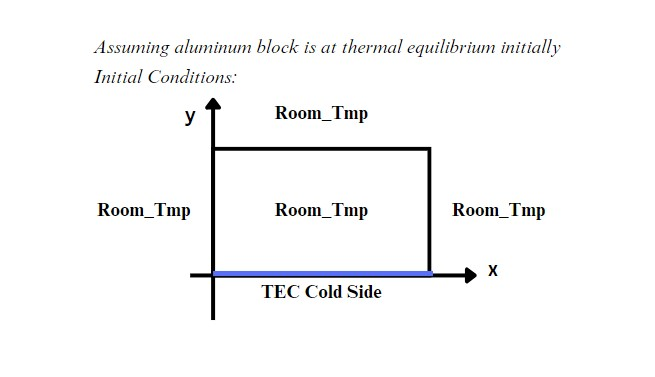

In [29]:
#Importing relevant python libraries 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

#Debugger line to show that code is running 
print("2D Heat Equation of Block")
    
#Dimensions of block in mm 
block_height= 3
block_length = 40
#note to include endpoints as well 
no_of_x_points = 401
no_of_y_points = int((3/40)*(no_of_x_points-1) + 1)

#Thermal conductivity of aluminium block(W mm^-1 K^-1)
alpha = 237/1000

#No of time intervals
max_iter_time = 100

#Assuming that delta x and delta y are the same, matrix is proportional to actual dimensions
delta_x = block_length/(no_of_x_points-1)
delta_y = delta_x

#Stability criterion for Explicit method. Animation will go to oscillating mode if criterion is not met 
delta_t = (delta_x ** 2)/(4 * alpha)

#Variables in explicit formula (refer to report for more information)
gamma_x = (alpha * delta_t) / (delta_x ** 2)
gamma_y = (alpha * delta_t) / (delta_x ** 2)

# Initialize solution: the grid of u(k, j, i)
u = np.empty((max_iter_time, no_of_y_points , no_of_x_points))

#Setting of Boundary and Initial Conditions 

# Initial Condition Everywhere inside the grid
room_tmp = 33.6 
u.fill(room_tmp)

# Boundary conditions
u_top = room_tmp 
u_left = room_tmp
#TEC Cold side temperature, assuming that TEC is able to sustain cold side temperature for set timing 
u_bottom = 15.0
u_right = room_tmp 

u[:, no_of_x_points-1:, :] = u_top
u[:, :, :1] = u_left
u[:, :1, 1:] = u_bottom
u[:, :, no_of_x_points-1:] = u_right

def calculate(u):
    for k in range(0, max_iter_time-1, 1):
        for j in range(1, no_of_y_points-1, 1):
#line is valid because same number of points 
            for i in range(1, no_of_x_points-1, 1):
                u[k + 1, j, i] = gamma_y * (u[k][j+1][i] - 2*u[k][j][i]+ u[k][j-1][i])+ gamma_x *(u[k][j][i+1] + u[k][j][i-1] - 2*u[k][j][i]) + u[k][j][i]
    return u

def plotheatmap(u_k, k):
    # Clear the current plot figure
    plt.clf()
    
#time in 3dp 
    plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    plt.xlabel("Length of Aluminium Block (mm)")
    plt.ylabel("Height of Aluminium Block (mm)")
# change linspace() when change x points
# This is to plot u_k (u at time-step k), np.arange,np.linspace lines to create calibrated x,y coordinates.
#Code not optimised, manually input points desired 
    plt.pcolormesh(np.linspace(0, 40, 401),np.linspace(0,3, 31),u_k, cmap=plt.cm.jet, vmin=np.min(u_k), vmax=np.max(u_k))
    plt.colorbar()

    return plt

# Do the calculation here
u = calculate(u)

def animate(k):
    plotheatmap(u[k], k)
#interval= time interval between frames, repeat= loop animation
anim = animation.FuncAnimation(plt.figure(), animate, interval=0.1, frames=max_iter_time, repeat=False)
#saving heat diffusion animation as gif in computer 
anim.save("heat_equation_solution.mp4")

2D Heat Equation of Block


TypeError: 'float' object cannot be interpreted as an integer